# WiDS Assignment


**Welcome to your EDA assignment ! We hope you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about Pokemons.**

**We've got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**

This assignment is expected to be completed in Jupyter notebooks or Google Colab and submitted as an ipynb file.


### 1) Start by importing all important libraries
For eg, "import numpy as np"

Import numpy, matplotlib, seaborn, pandas and any others that you require.

In [138]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics
from statistics import mode, variance, median

### 2) Read the csv file and assign it to a variable . 

In [139]:
df = pd.read_csv('pokemon_dataset.csv')

### 3) Display shape of dataframe
Expected Output - (800, 13)

In [140]:
df.shape

(800, 13)

### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [141]:
print(df.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


### 5) Remove the column '#' and update the dataframe.

In [142]:
df=df.drop(columns='#')
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


###  7) Print a list of all the unique Type-1 powers

In [143]:
g = df['Type 1']
s=[]
unique = set(g)
unique
# for unique in g:
#   s = s.append(unique)
# s

{'Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water'}

### 1. How many pokemons have 'Mega' in their name?

In [144]:
# name = df['Name']
# for poke in name:
#   for word in poke.split():
#     if(word=='Mega'):
#       print('poke')
poke = df.loc[df['Name'].str.contains("Mega",case='True')]
len(poke)

49

### 2. What is the standard deviation of Sp. Def. in the dataset ?

In [145]:
print(df['Sp. Def'].std())

27.82891579711745


### 3. What percentage (upto 3 decimal places) of pokemons are legendary ? 

In [146]:
# legendary = df.loc[df['Legendary'].str.contains("TRUE",case='True')]
legend=df.Legendary.value_counts()
print((legend[1]/800)*100)

8.125


**Now that you have imported the dataset and libraries, and answered some basic questions, you can move on to the visualizations and some intermediate statistics !**

### Discrete variables:
a. For each variable, plot the frequency of each unique value (histogram).

b. For each variable, identify the mode value.

In [147]:
plt.style.use('fivethirtyeight')

The mode of Type 1 column is: Water = 112


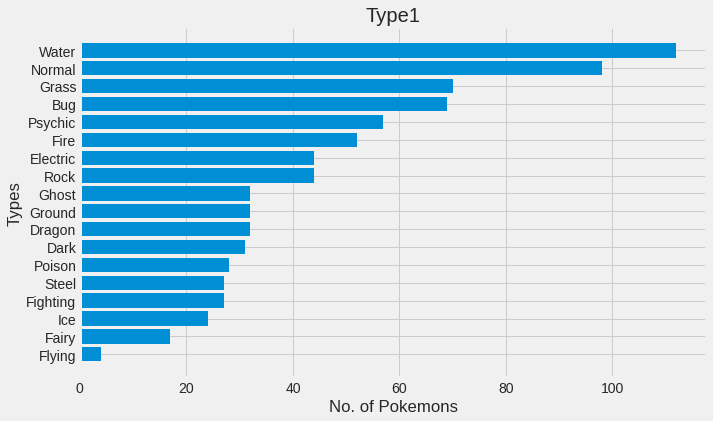

In [148]:
type1 = df['Type 1']
count=type1.value_counts()
types = []
c =[]
for i in range(len(count)):
  types.append(list(count.keys())[i])
  c.append(count[i])
types.reverse()
c.reverse()
# print(types)
# print(c)
plt.figure(figsize=(10,6))
plt.barh(types , c)
plt.xlabel('No. of Pokemons')
plt.ylabel('Types')
plt.title('Type1')

print('The mode of Type 1 column is: ' + str(mode(type1)) +' = '+ str(count[mode(type1)]))

The mode of Type 2 column is: Flying = 97


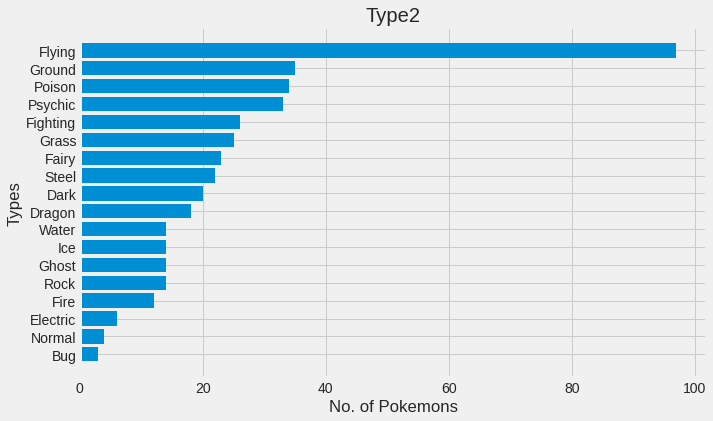

In [149]:
df_notnull = df.dropna()
type2 = df_notnull['Type 2']
count2 = type2.value_counts()
types2 = []
c2 = []
for i in range(len(count2)):
  types2.append(list(count2.keys())[i])
  c2.append(count2[i])
types2.reverse()
c2.reverse()
plt.figure(figsize=(10,6))
plt.barh(types2 , c2)
plt.xlabel('No. of Pokemons')
plt.ylabel('Types')
plt.title('Type2')

print('The mode of Type 2 column is: ' + str(mode(type2)) +' = '+ str(count2[mode(type2)]))

6
1
Mode = 1


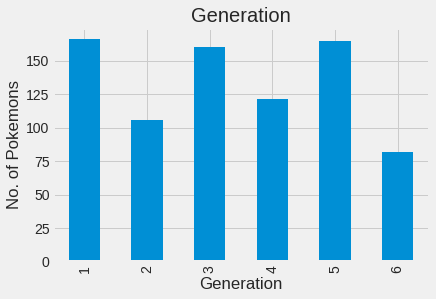

In [150]:
gen = df['Generation']
print(gen.max())
print(gen.min())
bins = np.arange(25,175,25)
gen.value_counts().sort_index().plot.bar()
# df['Generation'].value_counts.plot.bar() 
plt.xlabel('Generation')
plt.ylabel('No. of Pokemons')
plt.title('Generation')
# plt.grid(True)
print("Mode = " + str( mode(gen) ))

### Continuous variables:

(Define a function for parts 'a' and 'b' which will accept feature name as input and print/plot required quantities as output. This will save time)

a. For each variable, print mean, variance, skew, min, max, median, 25th percentile, 75th percentile, and inter-quartile range.

b. For each variable, plot box-and-whiskers plots.

c. For each variable, plot the histogram. (do this manually for each feature and adjust the number of bins)

d. For any 2 continuous variables, plot the QQ plot. Read online about how it is interpreted.



In [151]:
plt.style.use('seaborn-white')

In [152]:
def everything(name):
  all = df[name].describe()
  print('Mean = ' + str(all[1]))
  print('Variance = '+ str(statistics.variance(df[name])) )
  print(   'Skew = '+ str(   3*(all[1]-(statistics.median(df[name]))/all[2]  ))     )
  # skew = 3(Mean-median)/standard deviation
  print('Min = '+ str(all[3]))
  print('Max = '+ str(all[7]))
  print('Median = '+ str(statistics.median(df[name]))  )
  print('25th percentile = '+ str(all[4]))
  print('75th percentile = '+str(all[6]))
  print('Inter-quartile range = '+ str(all[6]-all[4]) )

In [153]:
everything('Total')

Mean = 435.1025
Variance = 14391.130907384231
Skew = 1294.054033909517
Min = 180.0
Max = 780.0
Median = 450.0
25th percentile = 330.0
75th percentile = 515.0
Inter-quartile range = 185.0


In [154]:
everything('HP')

Mean = 69.25875
Variance = 652.0193225907384
Skew = 200.13957377157152
Min = 1.0
Max = 255.0
Median = 65.0
25th percentile = 50.0
75th percentile = 80.0
Inter-quartile range = 30.0


In [155]:
everything('Attack')

Mean = 79.00125
Variance = 1053.480599186483
Skew = 230.07157932094185
Min = 5.0
Max = 190.0
Median = 75.0
25th percentile = 55.0
75th percentile = 100.0
Inter-quartile range = 45.0


In [156]:
everything('Defense')

Mean = 73.8425
Variance = 972.4107071339174
Skew = 214.7931694651573
Min = 5.0
Max = 230.0
Median = 70.0
25th percentile = 50.0
75th percentile = 90.0
Inter-quartile range = 40.0


In [157]:
everything('Sp. Atk')

Mean = 72.82
Variance = 1070.748535669587
Skew = 212.50076013148492
Min = 10.0
Max = 194.0
Median = 65.0
25th percentile = 49.75
75th percentile = 95.0
Inter-quartile range = 45.25


In [158]:
everything('Sp. Def')

Mean = 71.9025
Variance = 774.4485544430538
Skew = 208.1613921483333
Min = 20.0
Max = 230.0
Median = 70.0
25th percentile = 50.0
75th percentile = 90.0
Inter-quartile range = 40.0


In [159]:
everything('Speed')

Mean = 68.2775
Variance = 844.5111326658323
Skew = 198.12235473884948
Min = 5.0
Max = 180.0
Median = 65.0
25th percentile = 45.0
75th percentile = 90.0
Inter-quartile range = 45.0


In [160]:
everything('Generation')

Mean = 3.32375
Variance = 2.7598857947434294
Skew = 4.553774525890958
Min = 1.0
Max = 6.0
Median = 3.0
25th percentile = 2.0
75th percentile = 5.0
Inter-quartile range = 3.0


# Box Plots

In [161]:
plt.style.use('seaborn-white')

In [162]:
# data = df['HP']
# plt.boxplot(data)
# plt.show()


def boxplots(name):
  data = df[name]
  plt.boxplot(data)
  plt.ylabel('Values')
  plt.title(name)
  plt.grid(True)
  plt.show()

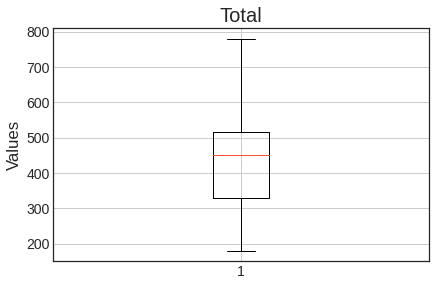

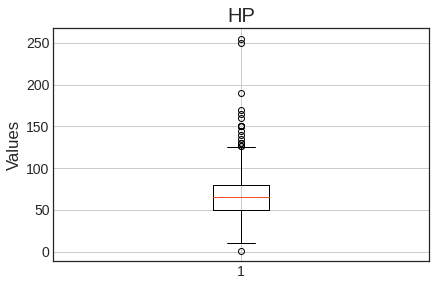

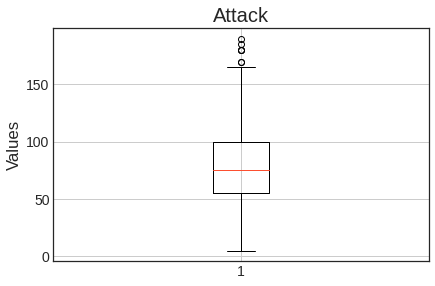

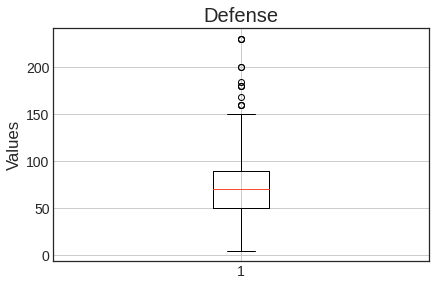

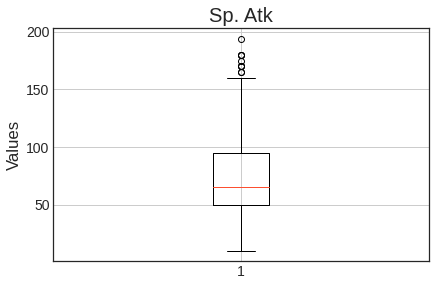

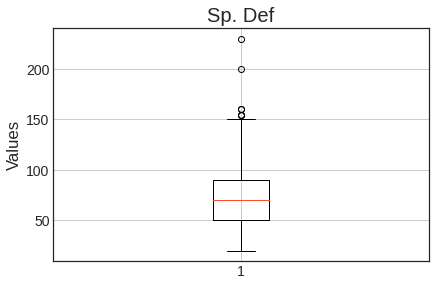

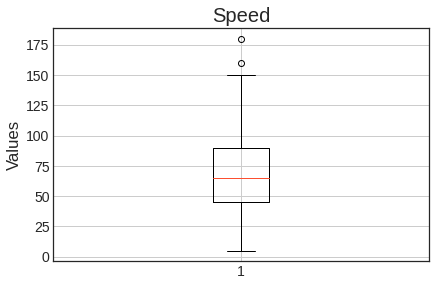

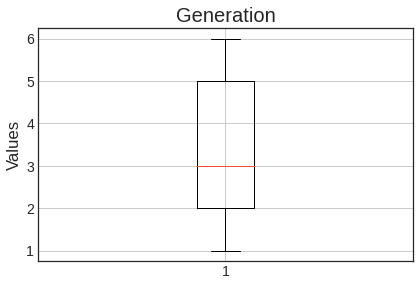

In [163]:
boxplots('Total')
boxplots('HP')
boxplots('Attack')
boxplots('Defense')
boxplots('Sp. Atk')
boxplots('Sp. Def')
boxplots('Speed')
boxplots('Generation')

# QQ Plot

In [164]:
from scipy.special import ndtri

**QQ plot for HP**

In [165]:
#QQ plot for HP
hp = df
hp = hp.drop(columns=['Name', 'Type 1', 'Type 2', 'Generation', 'Legendary'])
hp = hp.sort_values(by=['HP'], ascending = True).reset_index()
hp['count'] = hp.index+1
hp.head()

,index,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,count
0,316,236,1,90,45,30,30,40,1
1,55,265,10,55,25,35,45,95,2
2,139,200,20,10,55,15,20,80,3
3,388,295,20,40,90,30,90,25,4
4,487,310,20,25,45,70,90,60,5


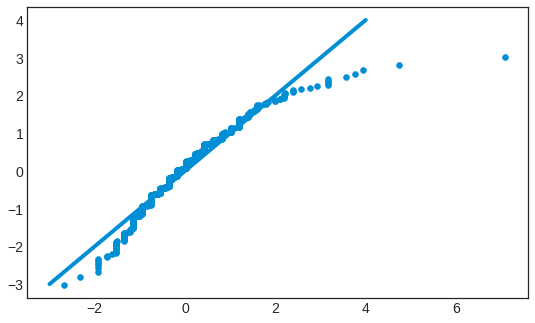

In [166]:
n = hp.shape[0]       #n=800
hp['percentile_area'] = (hp['count'])/n
# hp.head()
hp['z_theoretical'] = ndtri(hp['percentile_area'])
hp['z_actual'] = (hp['HP'] - hp['HP'].mean())/hp['HP'].std(ddof=0)
# hp.head()
plt.figure(figsize=(8,5))
plt.scatter(hp.z_actual, hp.z_theoretical)
plt.plot([-3,-2,-1,0,1,2,3,4], [-3,-2,-1,0,1,2,3,4])

In [167]:
# plt.scatter(hp.z_theoretical,hp.z_theoretical)
# plt.plot([-2,-1,0,1,2], [-2,-1,0,1,2])

**QQ plot for speed**

In [168]:
speed = df
speed = speed.drop(columns=['Name', 'Type 1', 'Type 2', 'Generation', 'Legendary'])
speed = speed.sort_values(by=['Speed'], ascending = True).reset_index()
speed['count'] = speed.index+1
speed.head()

,index,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,count
0,495,390,135,85,40,40,85,5,1
1,230,505,20,10,230,10,230,5,2
2,658,305,44,50,91,24,86,10,3
3,486,290,50,80,95,10,45,10,4
4,359,290,45,100,45,45,45,10,5


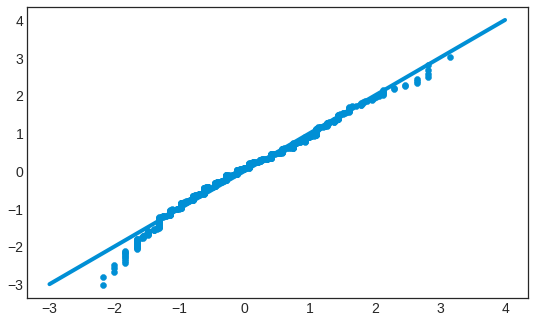

In [169]:
n = speed.shape[0]       #n=800
speed['percentile_area'] = (speed['count'])/n
speed['z_theoretical'] = ndtri(speed['percentile_area'])
speed['z_actual'] = (speed['Speed'] - speed['Speed'].mean())/speed['Speed'].std(ddof=0)
# hp.head()
plt.figure(figsize=(8,5))
plt.scatter(speed.z_actual, speed.z_theoretical)
plt.plot([-3,-2,-1,0,1,2,3,4], [-3,-2,-1,0,1,2,3,4])

# Histograms

255
1


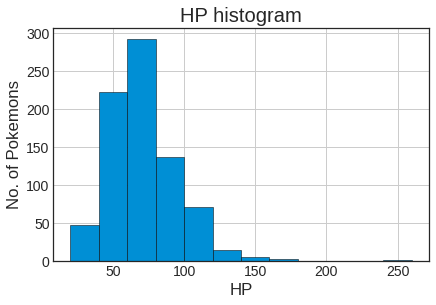

Mode = 60


In [170]:
hp = df['HP']
# hp.head()
print(hp.max())
print(hp.min())
bins = [20,40,60,80,100,120,140,160,180,200,220,240,260]
# pos = np.arange(50,500,50)
plt.hist(hp, bins=bins, edgecolor = 'black')
# plt.xticks(pos, bins)
plt.xlabel('HP')
plt.ylabel('No. of Pokemons')
plt.title('HP histogram')
plt.grid(True)
plt.show()
print("Mode = " + str( mode(hp) ))

190
5


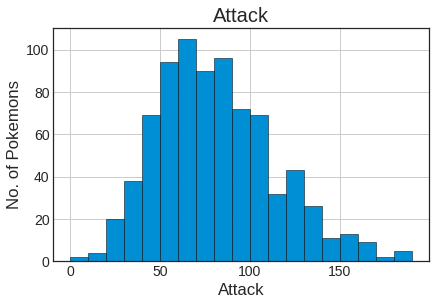

Mode = 100


In [171]:
attack = df['Attack']
print(attack.max())
print(attack.min())
bins = np.arange(0,200,10)
plt.hist(attack, bins=bins, edgecolor = 'black')
plt.xlabel('Attack')
plt.ylabel('No. of Pokemons')
plt.title('Attack')
plt.grid(True)
plt.show()
print("Mode = " + str( mode(attack) ))

194
10


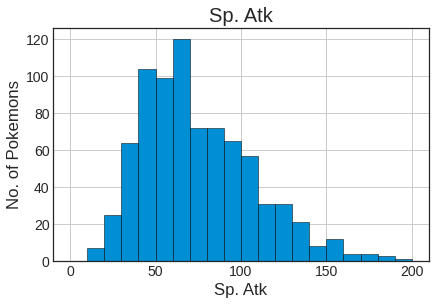

Mode = 60


In [172]:
spatk = df['Sp. Atk']
print(spatk.max())
print(spatk.min())
bins = np.arange(0,210,10)
plt.hist(spatk, bins=bins, edgecolor = 'black')
plt.xlabel('Sp. Atk')
plt.ylabel('No. of Pokemons')
plt.title('Sp. Atk')
plt.grid(True)
plt.show()
print("Mode = " + str( mode(spatk) ))

230
20


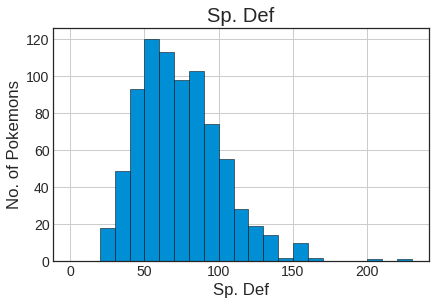

Mode = 80


In [173]:
spdef = df['Sp. Def']
print(spdef.max())
print(spdef.min())
bins = np.arange(0,240,10)
plt.hist(spdef, bins=bins, edgecolor = 'black')
plt.xlabel('Sp. Def')
plt.ylabel('No. of Pokemons')
plt.title('Sp. Def')
plt.grid(True)
plt.show()
print("Mode = " + str( mode(spdef) ))

180
5


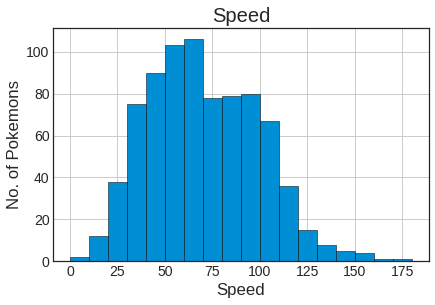

Mode = 50


In [174]:
speed = df['Speed']
print(speed.max())
print(speed.min())
bins = np.arange(0,190,10)
plt.hist(speed, bins=bins, edgecolor = 'black')
plt.xlabel('Speed')
plt.ylabel('No. of Pokemons')
plt.title('Speed')
plt.grid(True)
plt.show()
print("Mode = " + str( mode(speed) ))

780
180


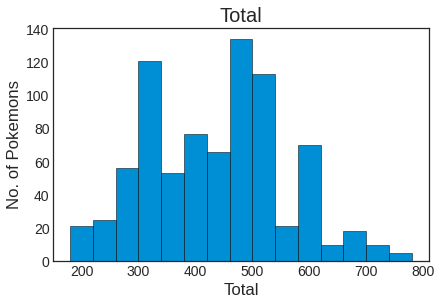

Mode = 600


In [175]:
total = df['Total']
print(total.max())
print(total.min())
bins = np.arange(180,820,40)
plt.hist(total, bins=bins, edgecolor = 'black')
plt.xlabel('Total')
plt.ylabel('No. of Pokemons')
plt.title('Total')
plt.show()
print("Mode = " + str( mode(total) ))

### Pairwise interactions

a. Pick any two discrete-continuous pairs, and plot box-and-whiskers plot for the continuous variable side-by-side for each value of the discrete variable.

b. Plot a heatmap of correlation between all pairs of continuous variables. Use seaborn for this.

# Box and Whisker Plot

In [176]:
#continuous = hp, attack ,spdef, spatck
#discrete = type1, type2

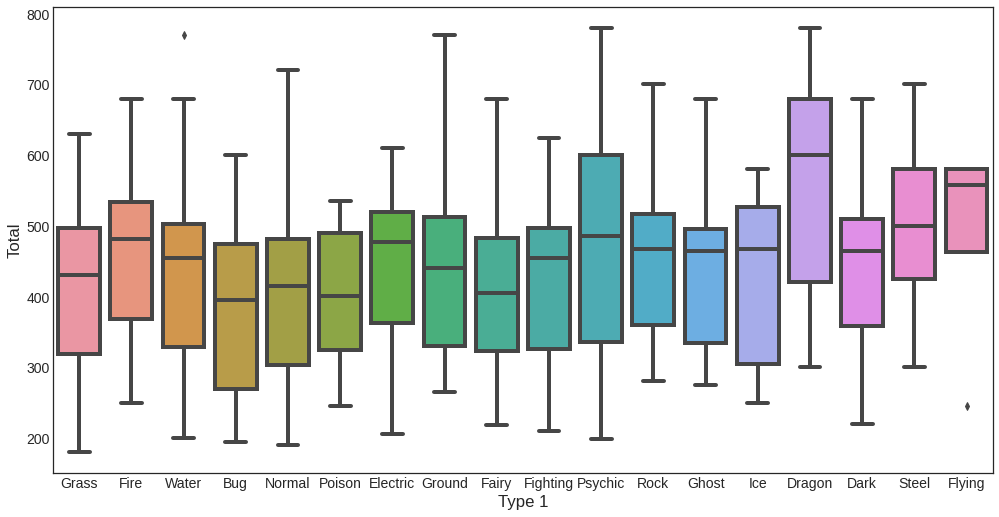

In [177]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df['Type 1'], y = df['Total'])

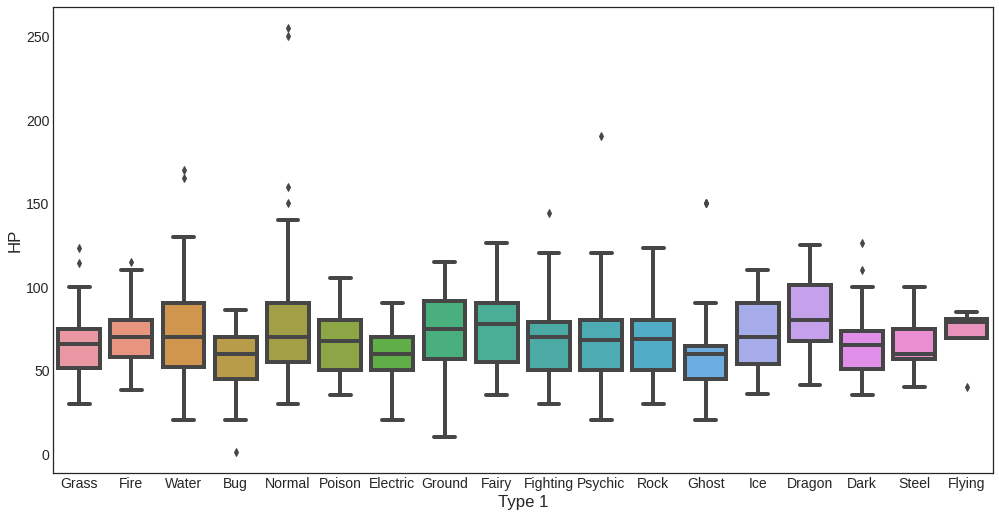

In [178]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df['Type 1'], y = df['HP'])

# Heatmap of correlation

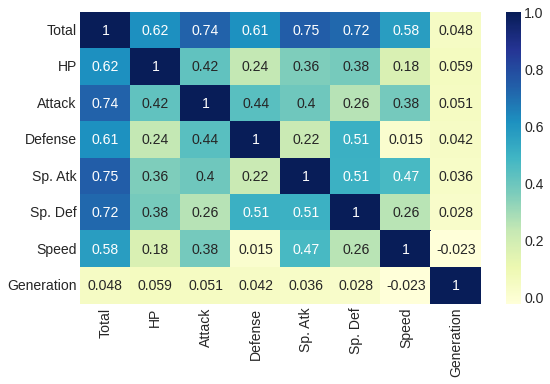

In [179]:
correlation = df.drop(columns = ['Name', 'Type 1', 'Type 2', 'Legendary'])
plt.figure(figsize=(8,5))
sns.heatmap(correlation.corr() ,cmap="YlGnBu",annot=True)